# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy().astype(np.float32)
y = mnist.target.to_numpy()
# Normalize the data
X /= 255.

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [6]:
def compute_svd(A, n_components, cache={}):

    # Compute Column Basis of symmetric matrix ATA

    cutoff = min(min(A.shape), n_components)
    eigenvalues, V = np.linalg.eig(A.T @ A)
    indices = np.argsort(eigenvalues.real)[::-1]
    eigenvalues = eigenvalues[indices][:cutoff].real
    V = V[:, indices][:, :cutoff].real
    singular_values = (eigenvalues) ** 0.5
    # Compute Row Basis Vectors
    U = (A @ V) * ((singular_values + 1e-10) ** -1)

    return U

In [7]:
def apply_svd_custom(X_train, X_test, n_components):
    u_train = compute_svd(X_train, n_components)
    u_test = compute_svd(X_test, n_components)
    return u_train, u_test


## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [9]:
svd_components = [5 * 5, 10 * 10, 15 * 15, 20 * 20]  # You need to decide what number to search...

# Store the results
results = []
print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append((X_train_svd[0], n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.2333, Training time: 1.7111 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.2510, Training time: 6.4328 seconds
Applying custom SVD with 225 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 225, Accuracy: 0.2463, Training time: 12.2584 seconds
Applying custom SVD with 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.2439, Training time: 21.2476 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


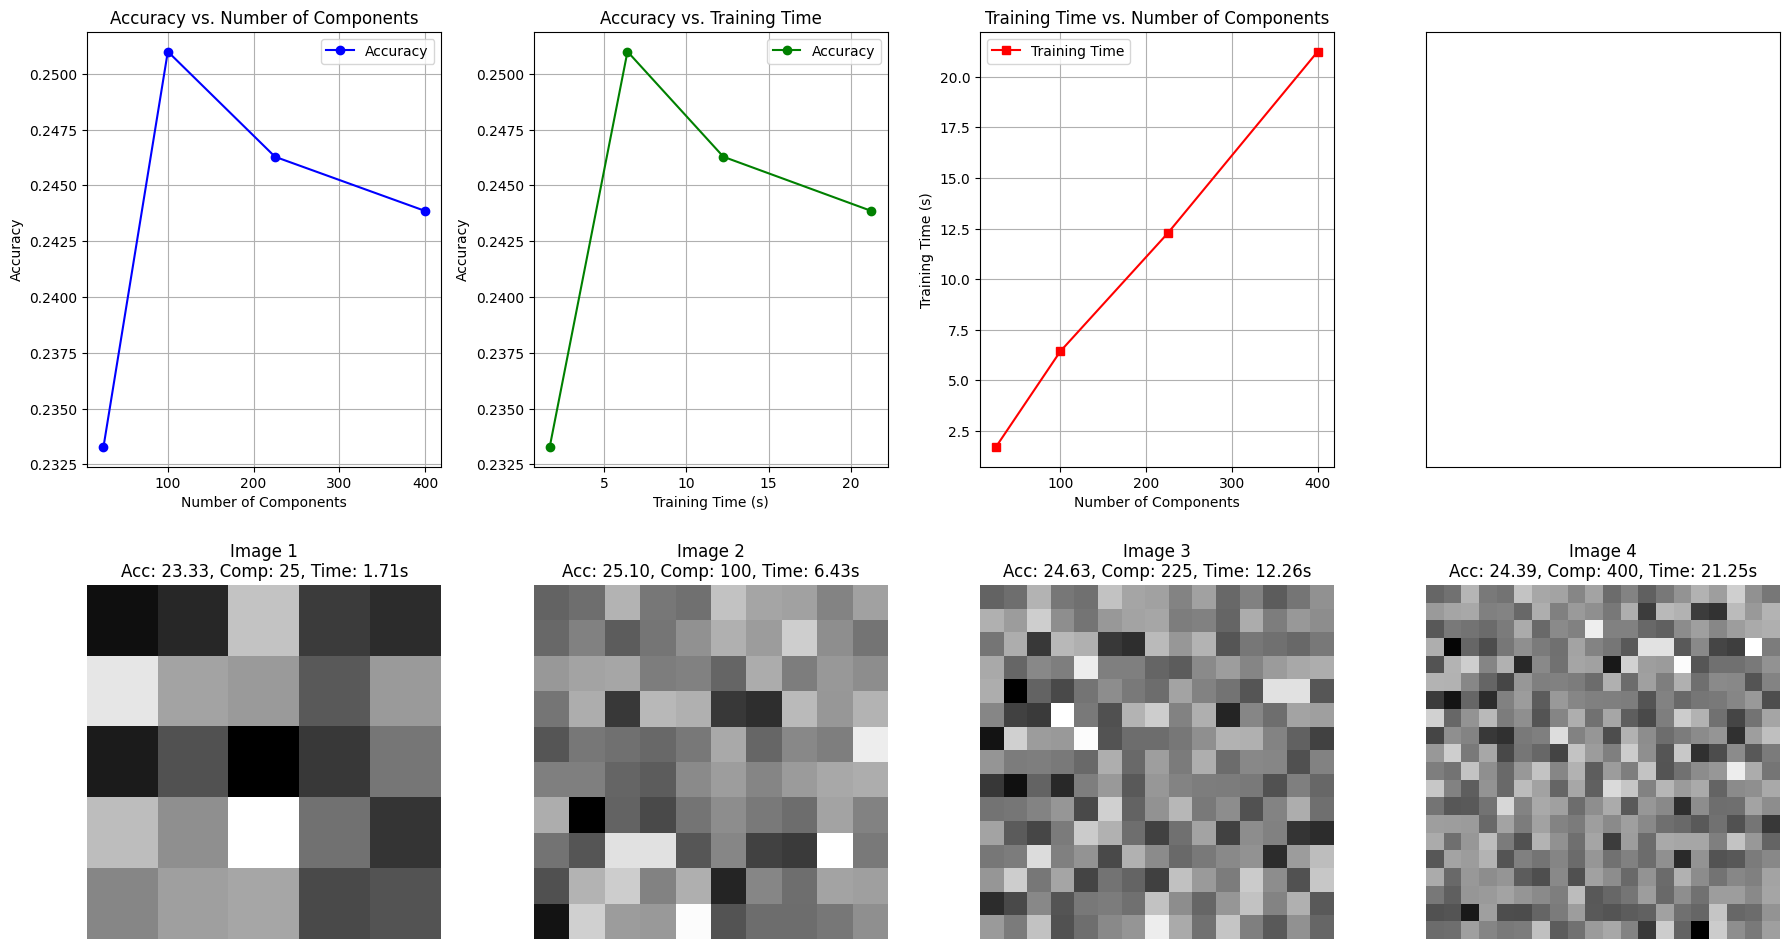

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results_with_images(result):
    # Extract the data from the result
    accuracies = [r[2] for r in result]
    n_components = [r[1] for r in result]
    training_times = [r[3] for r in result]
    images = [r[0] for r in result]


    # Create a figure and axes for subplots
    fig, axs = plt.subplots(2, 4, figsize=(18, 10))

    # Plot 1: Accuracy vs. Number of Components
    axs[0, 0].plot(n_components, accuracies, 'o-', color='b', label='Accuracy')
    axs[0, 0].set_xlabel('Number of Components')
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 0].set_title('Accuracy vs. Number of Components')
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Plot 2: Accuracy vs. Training Time
    axs[0, 1].plot(training_times, accuracies, c='g', marker='o', label='Accuracy')
    axs[0, 1].set_xlabel('Training Time (s)')
    axs[0, 1].set_ylabel('Accuracy')
    axs[0, 1].set_title('Accuracy vs. Training Time')
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Plot 3: Training Time vs. Number of Components
    axs[0, 2].plot(n_components, training_times, 's-', color='r', label='Training Time')
    axs[0, 2].set_xlabel('Number of Components')
    axs[0, 2].set_ylabel('Training Time (s)')
    axs[0, 2].set_title('Training Time vs. Number of Components')
    axs[0, 2].grid(True)
    axs[0, 2].legend()

    axs[0, 3].get_xaxis().set_visible(False)
    axs[0, 3].get_yaxis().set_visible(False)
    # Plot 4, 5, 6: Images
    for i in range(len(images)):
        size = int(np.sqrt(n_components[i]))
        axs[1, i].imshow(images[i].reshape([size, size]), cmap='gray')
        axs[1, i].set_title(f'Image {i+1}\nAcc: {accuracies[i] * 100:.2f}, Comp: {n_components[i]}, Time: {training_times[i]:.2f}s')
        axs[1, i].axis('off')  # Turn off axes for image plots

    # Tight layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()


plot_results_with_images(results)


## Part 6: Analyze / Conclusion

YOUR ANSWER: The more the number of components we have, the better our accuracy gets. However, the more components we have, the slower it is to train. The singular vectors get more and more complicated. However, after some point, curse of dimensionality starts setting in, and the accuracy starts plateauing, since we are using a simple classifier (a logisitic regression).